# Machine Learning and Statistics Project 2020

## Project Question?

In this project you must create a web service that uses machine learning to make predictions based on the data set powerproduction available on Moodle. The goal is to produce a model that accurately predicts wind turbine power output from wind speed values, as in the data set. You must then develop a web service that will respond with
predicted power values based on speed values sent as HTTP requests.

## Research

Renewable energy sources play an increasingly important role in the global energy mix, as the effort to reduce the environmental impact of energy production increases. Out of all the renewable energy alternatives, wind energy is the most developed technology worldwide with over 597GW capacity in 2018. A wind turbine’s blades sweep through a circular disk, known as the rotor disk (figure below). The power output by a wind turbine is a function of the kinetic energy flux through the rotor disk and the efficiency with which that energy can be captured. If the wind has an instantaneous speed u that is uniform throughout a rotor disk of diameter d, the power captured is:[1]

![image](https://raw.githubusercontent.com/NiamhOL/Machine-Learning-and-Statistics-Project-2020/main/equation.PNG)

![image](https://raw.githubusercontent.com/NiamhOL/Machine-Learning-and-Statistics-Project-2020/main/Turbine.png)

However, real wind turbines do not achieve this theoretical limit. Their performance is a function of aerodynamics and the need to limit power capture once the rated generator power is reached, at ‘rated’ wind speed. The generator power, turbine diameter and blade shape are optimized based on site characteristics such as annual average wind speed and the wind speed distribution. Turbine manufacturers measure their turbine’s ‘power curve’—the relationship between power output and wind speed—at turbine test sites.[1]

The power curve of a wind turbine presents the electrical power output ratings of the machine for different wind speeds. A typical wind turbine power curve has three main characteristic speeds: 1) cut-in (Vc ); 2) rated (Vr ); and 3) cut-out (Vs) speeds. The turbine starts generating power when the wind speed reaches the cut-in value. The rated speed is the wind speed at which the generator is producing the machine’s rated power. When the wind speed reaches the cut-out speed, the power generation is shut down to prevent defects and damages. Theoretical power curves are supplied by manufacturers assuming ideal meteorological and topographical conditions. In practice, however, wind turbines are never used under ideal conditions, and the empirical power curves could be substantially different from the theoretical ones due to the location of the turbine, air density, wind velocity distribution, wind direction, mechanical and control issues, as well as uncertainties in measurements [2]

Wind power is directly related to the wind speed through a so-called power curve. This is a simplified way of expressing the wind power in terms of atmospheric variables. Other atmospheric fields, such as wind shear, turbulence and air density have also impact on the actual power production for a given wind speed. However, for wind power verification wind speed is the most important parameter, because the bulk of the prediction error is caused by the wind speed prediction errors [3]

Given this relationship between wind speed and wind power generation, the efforts in our work will be focused on the prediction of the wind speed variable, because is the fundamental feature for the wind power generation.


![image](https://raw.githubusercontent.com/NiamhOL/Machine-Learning-and-Statistics-Project-2020/main/Wind%20speed%20power.png) 

In reality, one will see a swarm of points spread around the blue line, and not the neat curve in the graph.
The reason is that in practice the wind speed always fluctuates, and one cannot measure exactly the column of wind that passes through the rotor of the turbine. (It is not a workable solution just to place an anemometer in front of the turbine, since the turbine will also cast a "wind shadow" and brake the wind in front of itself).
In practice, therefore, one has to take an average of the different measurements for each wind speed, and plot the graph through these averages.Furthermore, it is difficult to make exact measurements of the wind speed itself. If one has a 3 per cent error in wind speed measurement, then the energy in the wind may be 9 per cent higher or lower (remember that the energy content varies with the third power of the wind speed).
Consequently, there may be errors up to plus or minus 10 per cent even in certified power curves.[8]

## Overview of data

In [1]:
# import modules used in the analysis
import pandas as pd
from pandas import DataFrame as df
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model as lm
from sklearn import svm
from sklearn.metrics import mean_squared_error
import math
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
import tensorflow.keras as kr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics


In [2]:
ds = pd.read_csv("powerproduction.csv") # open the dataset

In [3]:
ds.columns # display column names

Index(['speed', 'power'], dtype='object')

In [4]:
ds.info() # display basic information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   speed   500 non-null    float64
 1   power   500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [5]:
ds = pd.read_csv("powerproduction.csv")

In [6]:
ds.loc[2:8] # display the first eight records 

,speed,power
2,0.150,0.000
3,0.225,0.000
4,0.275,0.000
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048


In [20]:
print(ds.describe()) # describe the dataset

            speed       power
count  500.000000  500.000000
mean    12.590398   48.014584
std      7.224991   41.614572
min      0.000000    0.000000
25%      6.324750    5.288000
50%     12.550500   41.645500
75%     18.775250   93.537000
max     25.000000  113.556000


From the imported datset, it can be seen that there are five hundred observations of wind speed and power. The speed units are ain metres/second (m/s), with a mean speed of 12.6 m/s (min 0.0 m/s and max 25.0 m/s). The wind power is measured in kilowatts (kW) has a mean of 48.01 kW (min 0.0 kW and max 113.56 kW). 

Before any models can be described, it is important to have a closer look at the distribution of the data. Below are number of graphs used to display the data illustratively.

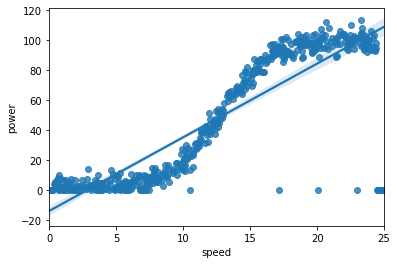

In [7]:
sns.regplot(x='speed',y='power',data = ds) # regplot to visualise a simple linear regression
plt.show()

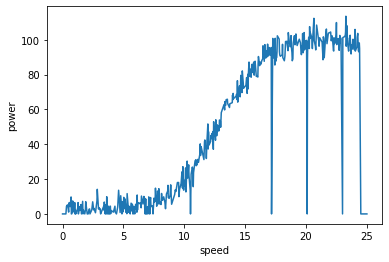

In [8]:
sns.lineplot(x='speed',y='power',data = ds) # lineplot clearly shows the occurances of 0.0 m/s wind speed.
plt.show()

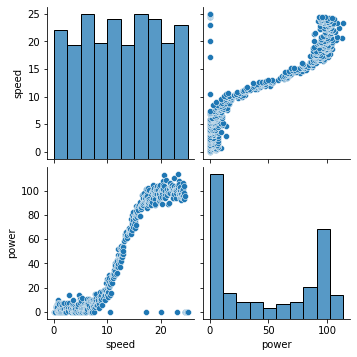

In [9]:
sns.pairplot(ds) # pairplot - showing data comparisions

In [10]:
ds.corr()

,speed,power
speed,1.000000,0.853778
power,0.853778,1.000000


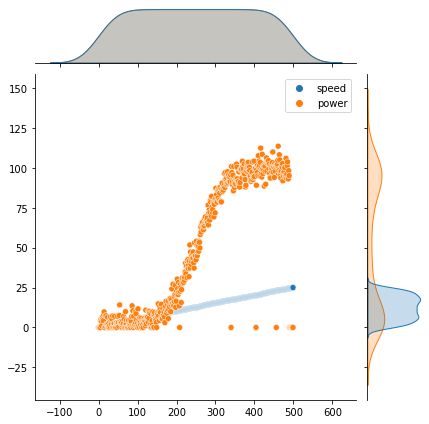

In [11]:
sns.jointplot( data = ds) # jointplot - clearly shows correlation between speed and power

Looking at the raw data, there are days that the wind speed is 0.275 of below, when no power is generated. Also when speeds are 24.499 or greater. 

## Cleaning the data

As discussed earlier a number of elements need to be considered while modelling the power curves of wind turbines. It must be noted that the data is affected by nonproduction of turbines. Null enteries can result is inaccurate models, hence these outliers need to be removed and the dataset "cleaned" before modelling.

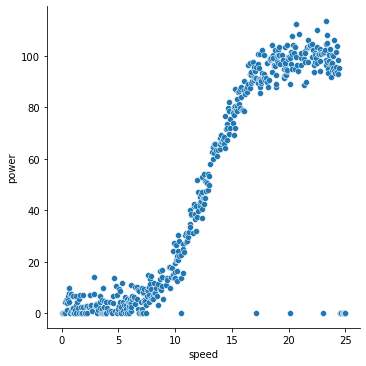

In [12]:
sns.relplot(x="speed", y="power", data=ds);

In [13]:
ds[ds.power == 0].count()

speed    49
power    49
dtype: int64

In [14]:
# Select data from speed & power = to 0.
clean_d = ds[(ds["speed"]==0) & (ds["power"]==0)]

# Values where values are greater than 0
above_zero = ds[(ds["speed"]>0) & (ds["power"]>0)]

# Append data 
clean_d = clean_d.append(above_zero)

clean_d

,speed,power
0,0.000,0.000
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
...,...,...
485,24.249,103.700
486,24.299,93.694
487,24.349,93.078
488,24.374,98.223


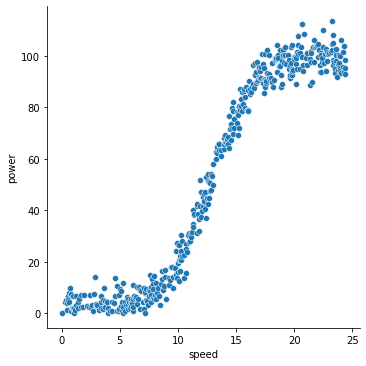

In [15]:
sns.relplot(x="speed", y="power", data=clean_d);

<AxesSubplot:xlabel='speed', ylabel='power'>

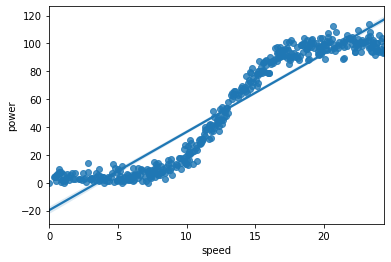

In [16]:
# Pick out two variables.
power = clean_d[["speed", "power"]].dropna()
# Scatter and fit line for just those two variables.
sns.regplot(x="speed", y="power", data=clean_d)

##  Linear Regression


Linear regression attempts to model the relationship between two variables by fitting a linear equation to observed data. One variable is considered to be an explanatory variable, and the other is considered to be a dependent variable.[9] 

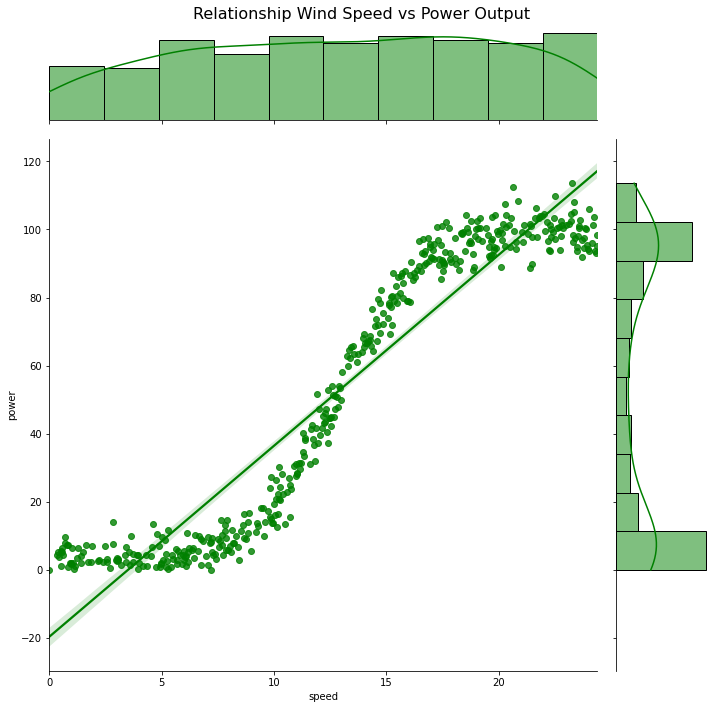

In [17]:
plot = sns.jointplot(x="speed", y="power",kind="reg", color="g", height=10, data=clean_d) # plot relationship between speed and power

plt.subplots_adjust(top=0.95)
plt.suptitle("Relationship Wind Speed vs Power Output", fontsize = 16)

plt.show()

The power output from the turbine is not a linear function of wind speed (figure below), so, multivariate linear regression is not an appropriate technique. Non-linear regression assumes that the relationships are constant throughout the model space (i.e. power output is always proportional to Un), which from figure below is incorrect, so non-linear regression is also inappropriate. Also, multivariate bins only work where the training data includes data in all bins and so would be computationally or observationally more expensive. Instead, a technique is required that can capture non-linear changes in response to forcing.[7]

![image](https://raw.githubusercontent.com/NiamhOL/Machine-Learning-and-Statistics-Project-2020/main/linear%20regression.PNG)

In [18]:
import sklearn.linear_model as lin # creating linear regression correlation

x = clean_d["speed"].to_numpy()
y = clean_d["power"].to_numpy()

x = x.reshape(-1, 1)

model = lin.LinearRegression()
model.fit(x, y)
r = model.score(x, y)
p = [model.intercept_, model.coef_[0]]

In [19]:
r

0.8983450728341917

In [20]:
p

[-19.636232996770858, 5.606684691495636]

In [21]:
def f(x, p):
    return p[0] + x * p[1]

In [22]:
def predict(x):
    return f(x,p)

In [23]:
# predict power output at different windspeeds...
f(13,p)

53.25066799267242

In [24]:
predict(13)

53.25066799267242

In [25]:

predict(17.5)

78.48074910440278

In [26]:

predict(20)

92.49746083314187

In [27]:
import numpy as np
import matplotlib.pyplot as pl

In [28]:

x = clean_d["speed"].to_numpy()
y = clean_d["power"].to_numpy()

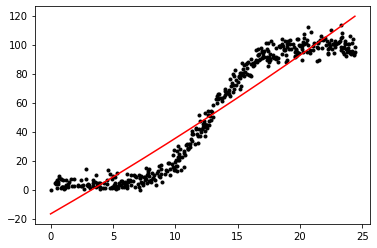

In [29]:
# plot linear regression correlation of power and speed
a,b,c = np.polyfit(x,y,2)
plt.plot(x, y, 'k.')
plt.plot(x, a * x * x + b * x  +  c , 'r-');

In [30]:
a, b, c , d = np.polyfit(x, y, 3) # display the polynominal fit of the data 

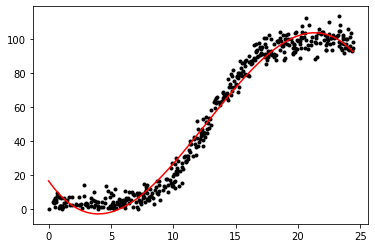

In [31]:
plt.plot(x, y, 'k.')
plt.plot(x, a * x * x * x + b * x *x  +  c * x + d, 'r-');

## Neural Networks Model 

The basic computation unit in a neural network is a neuron, commonly referred to as a “node” or “unit”. The node receives input from other nodes or receives input from an external source and calculates the output. Each input is supplemented with “weight” (w), which depends on the relative importance of other inputs. Feed foward neural network is the first invented and simplest artificial neural network. It contains multiple neurons (nodes) arranged in multiple layers. Nodes in adjacent layers have connections or edges. All connections are equipped with weights. In the definition of MLP, there is at least one hidden layer (excluding one input layer and one output layer). The architecture of the fully connected neural network is as illustrated in Figure 4. The leftmost !circle represents the hidden layer, the middle circle corresponds to the hidden layer, the rightmost circle serves as output and the blue line represents weight. In the MLP architecture, each layer is fully connected. The MLP uses backpropagation to adjust the weight value during each training session. Following the MLP training, the calculation result can be output through layer-by-layer transfer. [3]

![image](https://raw.githubusercontent.com/NiamhOL/Machine-Learning-and-Statistics-Project-2020/main/NNN.png)


Another common approach is based on the use of Artificial Neural Networks (ANN). The NWP forecasts and further meteorological variables are transformed into the wind power or speed forecast by ANN which has been trained by the large sets of historical data in order to learn the dependence of the output on input variables. The general ANN approach for wind speed and power forecast is shown in Fig above. 

ANN is one of the widely used statistical approaches for wind speed and power forecasts. It consists of an input layer, one or more hidden layers, and an output layer. Each layer has a number of artificial neurons, and it uses a connectionist approach to connect the neurons to the neurons of the previous layer. This approach is able to model the complex non-linear relationship between the input and output layers through a training and learning process. This approach does not require explicit mathematical expressions as used in the physical and statistical approaches reviewed previously. Furthermore, it has the ability of self-learning, self-organizing and self-adaption. [4]


In [32]:
dataset = clean_d.values # import clean dataset

In [33]:
dataset

array([[0.00000e+00, 0.00000e+00],
       [3.25000e-01, 4.33100e+00],
       [4.00000e-01, 5.18600e+00],
       [4.50000e-01, 3.82600e+00],
       [5.01000e-01, 1.04800e+00],
       [5.26000e-01, 5.55300e+00],
       [5.51000e-01, 6.49800e+00],
       [5.76000e-01, 5.24100e+00],
       [6.26000e-01, 4.22000e+00],
       [6.76000e-01, 7.97400e+00],
       [7.01000e-01, 9.74600e+00],
       [8.01000e-01, 7.27100e+00],
       [8.26000e-01, 7.95000e-01],
       [8.51000e-01, 7.35000e+00],
       [9.26000e-01, 1.99600e+00],
       [9.51000e-01, 1.60900e+00],
       [9.76000e-01, 2.06400e+00],
       [1.00100e+00, 6.51100e+00],
       [1.05100e+00, 2.08500e+00],
       [1.10100e+00, 1.21000e-01],
       [1.15100e+00, 1.20800e+00],
       [1.25100e+00, 3.37300e+00],
       [1.27600e+00, 6.51000e+00],
       [1.40100e+00, 4.15600e+00],
       [1.42600e+00, 2.00500e+00],
       [1.50200e+00, 5.35200e+00],
       [1.65200e+00, 7.22100e+00],
       [1.70200e+00, 2.43900e+00],
       [1.87700e+00,

In [34]:
X = dataset[:,0:1]

In [35]:
Y = dataset[:,1]

In [36]:
from sklearn import preprocessing 

In [37]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [38]:
X_scale

array([[0.        ],
       [0.01332022],
       [0.01639411],
       [0.01844338],
       [0.02053363],
       [0.02155826],
       [0.02258289],
       [0.02360752],
       [0.02565679],
       [0.02770605],
       [0.02873069],
       [0.03282921],
       [0.03385385],
       [0.03487848],
       [0.03795238],
       [0.03897701],
       [0.04000164],
       [0.04102627],
       [0.04307554],
       [0.0451248 ],
       [0.04717406],
       [0.05127259],
       [0.05229723],
       [0.05742039],
       [0.05844502],
       [0.0615599 ],
       [0.06770769],
       [0.06975696],
       [0.07692938],
       [0.07795401],
       [0.08922497],
       [0.09127423],
       [0.09844666],
       [0.10152055],
       [0.10463544],
       [0.10566007],
       [0.11078323],
       [0.11590639],
       [0.11693102],
       [0.12102955],
       [0.12307881],
       [0.12410345],
       [0.12512808],
       [0.12615271],
       [0.13127587],
       [0.1384483 ],
       [0.13947293],
       [0.140

In [39]:
from sklearn.model_selection import train_test_split # split the data into two subsets for training 

In [40]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3) # train the data

In [41]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [42]:
model = kr.models.Sequential() # creeating a sequential nural network model
model.add(kr.layers.Dense(1, input_shape=(1,), activation="linear", kernel_initializer='ones', bias_initializer='zeros'))
model.add(kr.layers.Dense(1, input_shape=(1,), activation="linear", kernel_initializer='ones', bias_initializer='zeros'))

In [43]:
model.compile(optimizer='adam', loss='mean_squared_error') # 

In [44]:

model.fit(X_train, Y_train, epochs=500)

Epoch 1/500
10/10 [==============================] - 0s 903us/step - loss: 4321.9507
Epoch 2/500
10/10 [==============================] - 0s 1ms/step - loss: 4318.2627
Epoch 3/500
10/10 [==============================] - 0s 1ms/step - loss: 4314.7554
Epoch 4/500
10/10 [==============================] - 0s 2ms/step - loss: 4311.0151
Epoch 5/500
10/10 [==============================] - 0s 2ms/step - loss: 4307.2163
Epoch 6/500
10/10 [==============================] - 0s 2ms/step - loss: 4303.4976
Epoch 7/500
10/10 [==============================] - 0s 2ms/step - loss: 4299.6421
Epoch 8/500
10/10 [==============================] - 0s 2ms/step - loss: 4295.7651
Epoch 9/500
10/10 [==============================] - 0s 3ms/step - loss: 4291.7412
Epoch 10/500
10/10 [==============================] - 0s 2ms/step - loss: 4287.7783
Epoch 11/500
10/10 [==============================] - 0s 3ms/step - loss: 4283.6782
Epoch 12/500
10/10 [==============================] - 0s 3ms/step - loss: 4279.6050

10/10 [==============================] - 0s 2ms/step - loss: 2781.7712
Epoch 194/500
10/10 [==============================] - 0s 2ms/step - loss: 2771.2878
Epoch 195/500
10/10 [==============================] - 0s 2ms/step - loss: 2761.1365
Epoch 196/500
10/10 [==============================] - 0s 1ms/step - loss: 2750.8633
Epoch 197/500
10/10 [==============================] - 0s 1ms/step - loss: 2740.5349
Epoch 198/500
10/10 [==============================] - 0s 1ms/step - loss: 2730.1804
Epoch 199/500
10/10 [==============================] - 0s 2ms/step - loss: 2719.8940
Epoch 200/500
10/10 [==============================] - 0s 1ms/step - loss: 2709.6941
Epoch 201/500
10/10 [==============================] - 0s 2ms/step - loss: 2699.4971
Epoch 202/500
10/10 [==============================] - 0s 1ms/step - loss: 2689.3940
Epoch 203/500
10/10 [==============================] - 0s 2ms/step - loss: 2678.7622
Epoch 204/500
10/10 [==============================] - 0s 1ms/step - loss: 2668

10/10 [==============================] - 0s 1ms/step - loss: 1865.9659
Epoch 290/500
10/10 [==============================] - 0s 1ms/step - loss: 1857.7144
Epoch 291/500
10/10 [==============================] - 0s 1ms/step - loss: 1849.2039
Epoch 292/500
10/10 [==============================] - 0s 902us/step - loss: 1841.0220
Epoch 293/500
10/10 [==============================] - 0s 902us/step - loss: 1833.0376
Epoch 294/500
10/10 [==============================] - 0s 1ms/step - loss: 1824.8075
Epoch 295/500
10/10 [==============================] - 0s 1ms/step - loss: 1816.3881
Epoch 296/500
10/10 [==============================] - 0s 902us/step - loss: 1808.5813
Epoch 297/500
10/10 [==============================] - 0s 1ms/step - loss: 1800.5570
Epoch 298/500
10/10 [==============================] - 0s 1ms/step - loss: 1792.2344
Epoch 299/500
10/10 [==============================] - 0s 1ms/step - loss: 1784.4607
Epoch 300/500
10/10 [==============================] - 0s 1ms/step - loss

10/10 [==============================] - 0s 1ms/step - loss: 948.4958
Epoch 481/500
10/10 [==============================] - 0s 1ms/step - loss: 947.0048
Epoch 482/500
10/10 [==============================] - 0s 1ms/step - loss: 945.0819
Epoch 483/500
10/10 [==============================] - 0s 1ms/step - loss: 943.4397
Epoch 484/500
10/10 [==============================] - 0s 1ms/step - loss: 941.8611
Epoch 485/500
10/10 [==============================] - 0s 902us/step - loss: 940.1595
Epoch 486/500
10/10 [==============================] - 0s 1ms/step - loss: 938.5877
Epoch 487/500
10/10 [==============================] - 0s 2ms/step - loss: 936.9966
Epoch 488/500
10/10 [==============================] - 0s 2ms/step - loss: 935.5813
Epoch 489/500
10/10 [==============================] - 0s 2ms/step - loss: 933.7816
Epoch 490/500
10/10 [==============================] - ETA: 0s - loss: 1011.17 - 0s 2ms/step - loss: 932.3702
Epoch 491/500
10/10 [==============================] - 0s 2ms/

In [47]:
model.predict([1.0,2.0,3.0]) # data predict using model

array([[ 68.79811],
       [106.284  ],
       [143.76988]], dtype=float32)

"The principal components are then passed to the deep learning algorithm. TensorFlow is an
open source machine learning-based repository that works in extensive heterogeneous and complex
environments. It is used for a high level of computation, training data, sharing the state and the
operations used to mutate the states by dataflow graphs. It enables presentation of computations on
each node that may own or renew the mutable state in a dataflow graph. TensorFlow collects the node
information from the dataflow graph in a cluster through different machines and, further, throughout
numerous computational devices, for example, multicore central processing unit (CPU) and graphics
processing unit (GPU). It provides a flexible environment to the application developer and allows the
design of novel and optimized algorithms. It provides different types of applications for inference and
to train the deep neural network."[10]

import tensorflow.keras as k [11]


In [49]:
import tensorflow.keras as kr # adapted from https://www.machinecurve.com/index.php/2020/02/21/how-to-predict-new-samples-with-your-keras-model/

In [50]:
model = kr.models.Sequential()# adapted from https://machinelearningmastery.com/how-to-make-classification-and-regression-predictions-for-deep-learning-models-in-keras/

In [51]:

model.add(kr.layers.Dense(1, input_shape=(1,), activation='sigmoid', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.add(kr.layers.Dense(1, activation='linear', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))

In [52]:

model.compile('adam', loss='mean_squared_error')

In [53]:
model.fit(x, y, epochs=500, batch_size=10)

Epoch 1/500
46/46 [==============================] - 0s 981us/step - loss: 4137.7607
Epoch 2/500
46/46 [==============================] - 0s 1ms/step - loss: 4128.7793
Epoch 3/500
46/46 [==============================] - 0s 2ms/step - loss: 4119.9189
Epoch 4/500
46/46 [==============================] - 0s 1ms/step - loss: 4111.0928
Epoch 5/500
46/46 [==============================] - 0s 2ms/step - loss: 4102.1431
Epoch 6/500
46/46 [==============================] - 0s 1ms/step - loss: 4093.3701
Epoch 7/500
46/46 [==============================] - 0s 1ms/step - loss: 4084.5808
Epoch 8/500
46/46 [==============================] - 0s 2ms/step - loss: 4075.9705
Epoch 9/500
46/46 [==============================] - 0s 2ms/step - loss: 4067.2004
Epoch 10/500
46/46 [==============================] - 0s 2ms/step - loss: 4058.5439
Epoch 11/500
46/46 [==============================] - 0s 2ms/step - loss: 4049.8560
Epoch 12/500
46/46 [==============================] - 0s 2ms/step - loss: 4041.1699

46/46 [==============================] - 0s 1ms/step - loss: 3361.6548
Epoch 99/500
46/46 [==============================] - 0s 1ms/step - loss: 3354.2563
Epoch 100/500
46/46 [==============================] - 0s 1ms/step - loss: 3346.9858
Epoch 101/500
46/46 [==============================] - 0s 2ms/step - loss: 3339.6772
Epoch 102/500
46/46 [==============================] - 0s 1ms/step - loss: 3332.4202
Epoch 103/500
46/46 [==============================] - 0s 2ms/step - loss: 3325.0591
Epoch 104/500
46/46 [==============================] - 0s 1ms/step - loss: 3317.7666
Epoch 105/500
46/46 [==============================] - 0s 1ms/step - loss: 3310.3276
Epoch 106/500
46/46 [==============================] - 0s 894us/step - loss: 3303.1409
Epoch 107/500
46/46 [==============================] - 0s 981us/step - loss: 3295.7988
Epoch 108/500
46/46 [==============================] - 0s 1ms/step - loss: 3288.5974
Epoch 109/500
46/46 [==============================] - ETA: 0s - loss: 2149.

46/46 [==============================] - 0s 828us/step - loss: 2164.1653
Epoch 289/500
46/46 [==============================] - 0s 1ms/step - loss: 2158.9575
Epoch 290/500
46/46 [==============================] - 0s 1ms/step - loss: 2153.6848
Epoch 291/500
46/46 [==============================] - 0s 850us/step - loss: 2148.4236
Epoch 292/500
46/46 [==============================] - 0s 850us/step - loss: 2143.1995
Epoch 293/500
46/46 [==============================] - 0s 937us/step - loss: 2137.9377
Epoch 294/500
46/46 [==============================] - 0s 828us/step - loss: 2132.6511
Epoch 295/500
46/46 [==============================] - 0s 850us/step - loss: 2127.3755
Epoch 296/500
46/46 [==============================] - 0s 1ms/step - loss: 2122.1409
Epoch 297/500
46/46 [==============================] - 0s 981us/step - loss: 2116.9924
Epoch 298/500
46/46 [==============================] - ETA: 0s - loss: 2082.47 - 0s 1ms/step - loss: 2111.7434
Epoch 299/500
46/46 [==================

Epoch 383/500
46/46 [==============================] - 0s 850us/step - loss: 1706.1708
Epoch 384/500
46/46 [==============================] - 0s 828us/step - loss: 1701.8511
Epoch 385/500
46/46 [==============================] - 0s 828us/step - loss: 1697.5757
Epoch 386/500
46/46 [==============================] - 0s 894us/step - loss: 1693.1816
Epoch 387/500
46/46 [==============================] - 0s 894us/step - loss: 1688.8715
Epoch 388/500
46/46 [==============================] - 0s 1ms/step - loss: 1684.5403
Epoch 389/500
46/46 [==============================] - 0s 959us/step - loss: 1680.2317
Epoch 390/500
46/46 [==============================] - 0s 894us/step - loss: 1675.8566
Epoch 391/500
46/46 [==============================] - 0s 894us/step - loss: 1671.5532
Epoch 392/500
46/46 [==============================] - 0s 894us/step - loss: 1667.2764
Epoch 393/500
46/46 [==============================] - 0s 1ms/step - loss: 1662.9313
Epoch 394/500
46/46 [==========================

In [54]:
model = kr.models.Sequential()
model.add(kr.layers.Dense(9, input_shape=(1,), activation='sigmoid', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.add(kr.layers.Dense(1, activation='linear', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.compile('adam', loss='mean_squared_error')

In [55]:
model.fit(x, y, epochs=500, batch_size=10)

Epoch 1/500
46/46 [==============================] - 0s 1ms/step - loss: 4273.3232
Epoch 2/500
46/46 [==============================] - 0s 2ms/step - loss: 4238.6846
Epoch 3/500
46/46 [==============================] - 0s 3ms/step - loss: 4210.2505
Epoch 4/500
46/46 [==============================] - 0s 1ms/step - loss: 4184.5981
Epoch 5/500
46/46 [==============================] - 0s 741us/step - loss: 4157.9199
Epoch 6/500
46/46 [==============================] - 0s 676us/step - loss: 4111.1968
Epoch 7/500
46/46 [==============================] - 0s 1ms/step - loss: 4032.5952
Epoch 8/500
46/46 [==============================] - 0s 763us/step - loss: 3978.5288
Epoch 9/500
46/46 [==============================] - 0s 2ms/step - loss: 3904.7483
Epoch 10/500
46/46 [==============================] - 0s 2ms/step - loss: 3826.7310
Epoch 11/500
46/46 [==============================] - 0s 1ms/step - loss: 3782.5054
Epoch 12/500
46/46 [==============================] - 0s 2ms/step - loss: 3746.

Epoch 193/500
46/46 [==============================] - 0s 1ms/step - loss: 716.7014
Epoch 194/500
46/46 [==============================] - 0s 2ms/step - loss: 707.7427
Epoch 195/500
46/46 [==============================] - 0s 2ms/step - loss: 699.1697
Epoch 196/500
46/46 [==============================] - 0s 2ms/step - loss: 690.6921
Epoch 197/500
46/46 [==============================] - 0s 2ms/step - loss: 682.2451
Epoch 198/500
46/46 [==============================] - 0s 2ms/step - loss: 673.5581
Epoch 199/500
46/46 [==============================] - 0s 1ms/step - loss: 665.1220
Epoch 200/500
46/46 [==============================] - 0s 2ms/step - loss: 656.6483
Epoch 201/500
46/46 [==============================] - 0s 959us/step - loss: 648.2906
Epoch 202/500
46/46 [==============================] - 0s 894us/step - loss: 639.9883
Epoch 203/500
46/46 [==============================] - 0s 1ms/step - loss: 631.6143
Epoch 204/500
46/46 [==============================] - 0s 915us/step - l

46/46 [==============================] - 0s 1ms/step - loss: 19.4878
Epoch 387/500
46/46 [==============================] - 0s 1ms/step - loss: 19.3353
Epoch 388/500
46/46 [==============================] - 0s 894us/step - loss: 19.2152
Epoch 389/500
46/46 [==============================] - 0s 959us/step - loss: 19.1247
Epoch 390/500
46/46 [==============================] - 0s 894us/step - loss: 18.8871
Epoch 391/500
46/46 [==============================] - 0s 1ms/step - loss: 18.9753
Epoch 392/500
46/46 [==============================] - 0s 2ms/step - loss: 18.7038
Epoch 393/500
46/46 [==============================] - 0s 1ms/step - loss: 18.4850
Epoch 394/500
46/46 [==============================] - 0s 981us/step - loss: 18.3394
Epoch 395/500
46/46 [==============================] - 0s 981us/step - loss: 18.3659
Epoch 396/500
46/46 [==============================] - 0s 1ms/step - loss: 18.1753
Epoch 397/500
46/46 [==============================] - 0s 1ms/step - loss: 18.2791
Epoch 39

In [56]:

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 9)                 18        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 10        
Total params: 28
Trainable params: 28
Non-trainable params: 0
_________________________________________________________________


In [57]:
model.save_weights("wind_power_weights")
model.save('wind_power')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: wind_power\assets


In [58]:
from tensorflow.keras.models import load_model # load model
new_model = load_model('wind_power')

In [60]:
new_model.summary() # model summary

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 9)                 18        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 10        
Total params: 28
Trainable params: 28
Non-trainable params: 0
_________________________________________________________________


In [61]:
score = model.evaluate(x, y, verbose=0)
score

16.650739669799805

In [62]:
# 
model.predict([0.5])

array([[3.7871075]], dtype=float32)

In [63]:

model.predict([1.5])

array([[4.0690374]], dtype=float32)

In [64]:

model.predict([2.5])

array([[4.104144]], dtype=float32)

In [65]:

model.predict([5])

array([[3.9459524]], dtype=float32)

No handles with labels found to put in legend.


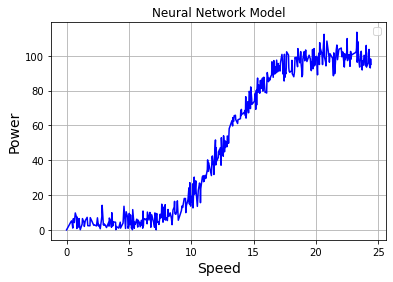

In [66]:
# plot the correaltion between speed and power used in the model
plt.plot(X, y, 'b')
plt.xlabel('Speed', fontsize='14')
plt.ylabel('Power', fontsize='14')
plt.title("Neural Network Model")
plt.grid()
plt.legend()

Technical improvements over the past decade have increased the size and power output capacity of wind power plants. Small increases in power performance are now financially attractive to owners. For this reason, the need for more accurate evaluations of wind turbine power curves is increasing. New investigations are underway with the main objective of improving the precision of power curve modeling. Due to the non-linear relationship between the power output of a turbine and its primary and derived parameters, Artificial Neural Network (ANN) has proven to be well suited for power curve modelling. It has been shown that a multi-stage modelling techniques using multilayer perceptron with two layers of neurons was able to reduce the level of both the absolute and random error.[5]

## References

1. Emhart et al, (2018), Exploring Machine Learning Models for Wind Speed Prediction (Masters Thesis) <https://upcommons.upc.edu/bitstream/handle/2117/117771/131678.pdf>
2. Calculating Energy Production From Weather Forecast In Python,  Medium https://medium.com/planet-os/calculating-energy-production-from-weather-forecast-in-python-3c990047daa
3. A Short-Term Wind Speed Forecasting Model by Using Artificial Neural Networks with Stochastic Optimization for Renewable Energy Systems Chiou-Jye Huang 1 and Ping-Huan Kuo 2
4. Emhart, (2018), Exploring Machine Learning Models for Wind Speed Prediction (Masters Thesis) https://upcommons.upc.edu/bitstream/handle/2117/117771/131678.pdf
5. Wind turbine power curve modelling using artificial neural network Author links open overlay panel Francis Pelletiera, Christian Massonb, and Antoine Tahanb.
6. Hal.archives-ouvertes.fr https://hal.archives-ouvertes.fr/hal-01373429v2/document
7. Heinermann ,P. (2016) Wind Power Prediction with Mcchine LEarning Ensembles (PhD thesis) 
8. Power Curve Of A Wind Turbine [online] (2020) [online], Xn--drmstrre-64ad.dk http://xn--drmstrre-64ad.dk/wp-content/wind/miller/windpower%20web/en/tour/wres/pwr.htm
9. Linear Regression [online] (2020) [online], Stat.yale.edu. http://www.stat.yale.edu/Courses/1997-98/101/linreg.htm
10. Wind Power - Energy Education [online] (2020) [online], Energyeducation.ca https://search.proquest.com/openview/d9b7dcb7acd44c890773b8de6e8e97c5/1?pq-origsite=gscholar&cbl=2032402
11. Neural Structured Learning  |  Tensorflow [online] (2020) [online], TensorFlow  https://www.tensorflow.org/neural_structured_learning
12. The Sequential Model  |  Tensorflow Core [online] (2020) [online], TensorFlow https://www.tensorflow.org/guide/keras/sequential_model
13. https://github.com/topics/wind-turbine
14. How To Predict New Samples With Your Keras Model? – Machinecurve [online] (2020) [online], MachineCurve. https://www.machinecurve.com/index.php/2020/02/21/how-to-predict-new-samples-with-your-keras-model/
15. Brownlee, J. (2020) How To Make Predictions With Keras [online], Machine Learning Mastery, available: https://machinelearningmastery.com/how-to-make-classification-and-regression-predictions-for-deep-learning-models-in-keras/ [accessed 31 Dec 2020] 
16. https://github.com/AdrianDonohoe
17. https://github.com/g00387822
18. https://github.com/markcot
19. https://github.com/elizabethdaly
20. https://github.com/daithimarkham?tab=repositories
21. https://github.com/andkoc001?tab=repositories
22. https://github.com/ianmcloughlin